In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__ )

2.0.0


In [0]:
x = np.linspace(0,10*np.pi,1000)
y = np.sin(x)
plt.plot(x,y, lw=2, c="r")

In [0]:
from sklearn.datasets import load_breast_cancer



In [0]:
# load the data
data = load_breast_cancer()

In [11]:
# return Sklearn.utils.Bunch object. Bunch is like a dict object  
type(data)

sklearn.utils.Bunch

In [12]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
# return 1 and 0 ; 1 stands for Cancer found
data.target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
data.data.shape


(569, 30)

In [0]:
# split the data
from sklearn.model_selection import train_test_split
# split the data with 30 percenter test data
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target, test_size=0.3)

In [0]:
N, D = xtrain.shape

In [0]:
# sclae data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [0]:
r = model.fit(xtrain,ytrain,
          epochs=100,
          validation_data = (xtest, ytest))

In [37]:
print ("Train Score",model.evaluate(xtrain,ytrain))
print ("Test Score",model.evaluate(xtest,ytest))


398/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

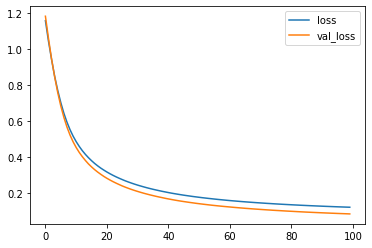

In [48]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

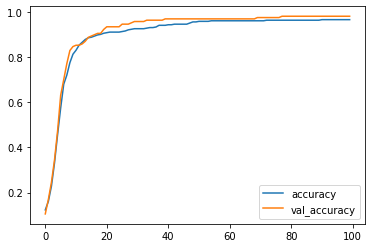

In [47]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [46]:
print(r.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
